In [31]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Explaining part

In [1]:
import os
import sys

sys.path.append('../')
os.chdir('../')


In [3]:
from pipelines.config import *

In [44]:
import dalex as dx
import pandas as pd
import pickle as pkl
import seaborn as sns

In [10]:
def create_explainer(data_path: str, model_path: str, target: str, label: str):

    df = pd.read_csv(data_path)
    X = df.drop(columns=[target])
    y = df[target]

    with open(model_path, "rb") as f:
        model = pkl.load(f)
    explainer = dx.Explainer(model, X, y, label=label)
    return explainer

## Example of usage

In [32]:
%%capture

exp_ordinal = create_explainer(raw_data_full_path, os.path.join(model_path, 'ordinal.pkl'), 'median_house_value', 'MLP with ordinal encoding')
exp_ordinal_power = create_explainer(raw_data_full_path, os.path.join(model_path, 'ordinal_power.pkl'), 'median_house_value', 'MLP with ordinal encoding and power transformation')
exp_hot = create_explainer(raw_data_full_path, os.path.join(model_path, 'onehot.pkl'), 'median_house_value', 'MLP with onehot encoding')
exp_hot_power = create_explainer(raw_data_full_path, os.path.join(model_path, 'onehot_power.pkl'), 'median_house_value', 'MLP with onehot encoding and power transformaiton')

In [ ]:
# random obervation

observation = pd.Series(
    {
        "longitude": -122.22,
        "latitude": 37.86,
        "housing_median_age": 21.0,
        "total_rooms": 7099.0,
        "total_bedrooms": 1106.0,
        "population": 2401.0,
        "households": 1138.0,
        "median_income": 8.3014,
        "ocean_proximity": "NEAR BAY",
    }
)

## Comparing models behavior

In [34]:
cp_ordinal = exp_ordinal.predict_profile(observation)
cp_ordinal_power = exp_ordinal_power.predict_profile(observation)
cp_hot = exp_hot.predict_profile(observation)
cp_hot_power = exp_hot_power.predict_profile(observation)

Calculating ceteris paribus: 100%|██████████| 9/9 [00:00<00:00, 80.88it/s]


In [37]:
cp_ordinal.plot(
    [cp_ordinal_power, cp_hot, cp_hot_power],
    variables=["total_bedrooms", "total_rooms"],
)

## Comparing variable importance 

In [46]:
df_ordinal = exp_ordinal.model_parts().result
df_ordinal["label"] = "ordinal"
df_ordinal_power = exp_ordinal_power.model_parts().result
df_ordinal_power["label"] = "ordinal_power"

df = pd.concat([df_ordinal, df_ordinal_power])

<AxesSubplot:xlabel='variable', ylabel='dropout_loss'>

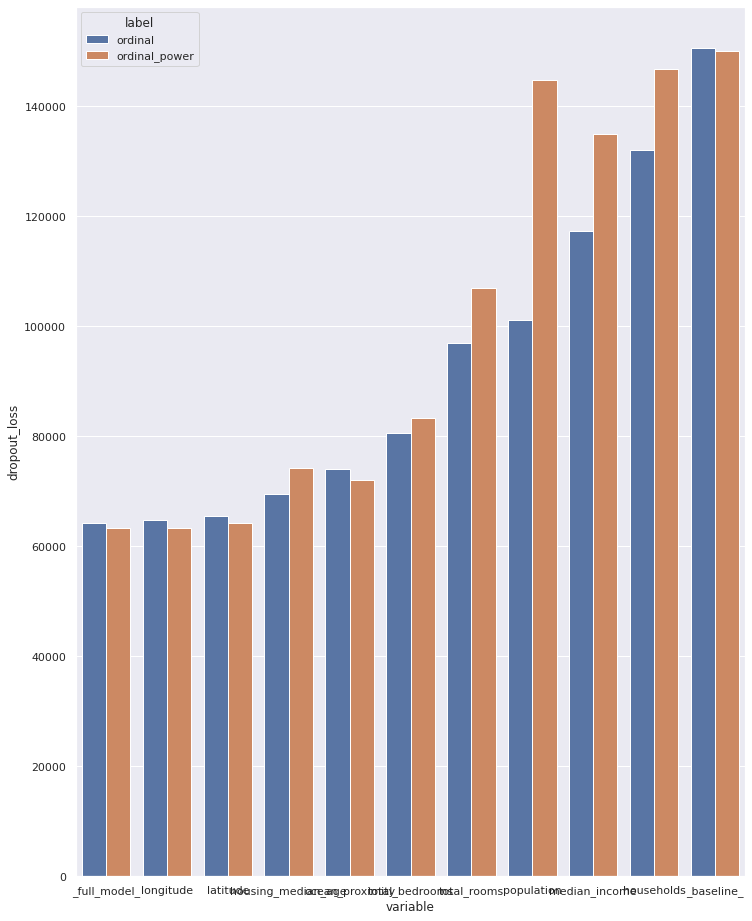

In [50]:
sns.set(rc={"figure.figsize": (12, 16)})

sns.barplot(x="variable", y="dropout_loss", hue="label", data=df)